# Introdução à Ciência de Dados com Python

## Prof. Dr. Neylson Crepalde

### Pandas DataFrames

Os DataFrames do Python são os Pandas!!! São estruturas excelentes de se trabalhar. Vamos pegar um caso de exemplo e fazer algumas análises descritivas.

In [1]:
import pandas as pd
import numpy as np

Vamos ler uma amostra de dados da PNAD 2012 direto da internet:

In [2]:
pnad = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/blob/master/dados/pes_2012.csv?raw=true")
pnad

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232
...,...,...,...,...,...,...,...,...,...
362446,2012,Distrito Federal,Feminino,51,Branca,15 anos ou mais,NaN,0,290
362447,2012,Distrito Federal,Masculino,53,Branca,12 anos,20000,20000,290
362448,2012,Distrito Federal,Masculino,21,Branca,13 anos,NaN,0,290
362449,2012,Distrito Federal,Masculino,19,Branca,13 anos,NaN,0,290


In [3]:
# Para verificar o tamanho do dataset
pnad.shape

(362451, 9)

In [4]:
# Para ver os nomes das colunas
pnad.columns

Index(['V0101', 'UF', 'V0302', 'V8005', 'V0404', 'V4803', 'V4718', 'V4720',
       'V4729'],
      dtype='object')

In [5]:
# Para visualizar apenas uma coluna
pnad['UF']

0                 Rondônia
1                 Rondônia
2                 Rondônia
3                 Rondônia
4                 Rondônia
                ...       
362446    Distrito Federal
362447    Distrito Federal
362448    Distrito Federal
362449    Distrito Federal
362450    Distrito Federal
Name: UF, Length: 362451, dtype: object

In [6]:
# OU
pnad.V0302

0         Masculino
1          Feminino
2          Feminino
3          Feminino
4          Feminino
            ...    
362446     Feminino
362447    Masculino
362448    Masculino
362449    Masculino
362450    Masculino
Name: V0302, Length: 362451, dtype: object

Vamos fazer algumas análises. Para as variáveis categóricas UF e V0302 (Cor/Raça) podemos fazer contagens de valores.

In [7]:
pnad['V0302'].value_counts()

Feminino     186054
Masculino    176397
Name: V0302, dtype: int64

Para montar uma tabelinha com valores proporcionais, basta dividir os valores pelo total.

In [8]:
pnad.V0302.value_counts() / pnad.shape[0]  # quantidade de homens e mulheres sobre o total de linhas

Feminino     0.513322
Masculino    0.486678
Name: V0302, dtype: float64

Para analisar a variável idade, vamos utilisar estatísticas descritivas.

In [9]:
# média
pnad.V8005.mean()

32.63801175883085

In [10]:
# OU
np.mean(pnad.V8005)

32.63801175883085

In [11]:
# mediana
pnad.V8005.median()

30.0

In [12]:
# Variância
pnad.V8005.var()

431.4064534606153

In [13]:
# desvio padrão (que é a raiz quadrada da variância)
pnad.V8005.std()

20.77032627236788

In [14]:
# Para várias estatísticas descritivas de uma vez, podemos usar 
pnad.V8005.describe()

count    362451.000000
mean         32.638012
std          20.770326
min           0.000000
25%          15.000000
50%          30.000000
75%          48.000000
max         117.000000
Name: V8005, dtype: float64

Para fazer filtros no dataset, podemos usar o método `loc`. A sintaxe do método é

```python
dataset.loc[linhas , colunas]
```

Nas linhas podemos passar tanto o índice quanto uma condição. Nas colunas podemos passar uma string com o nome da coluna ou uma lista com nomes de várias colunas.

In [17]:
# Selecionando apenas os 10 primeiros casos das variáveis V0302 e V4803
pnad.loc[:10, ['V0302', 'V4803']]

,V0302,V4803
0,Masculino,15 anos ou mais
1,Feminino,15 anos ou mais
2,Feminino,15 anos ou mais
3,Feminino,14 anos
4,Feminino,15 anos ou mais
5,Masculino,15 anos ou mais
6,Feminino,15 anos ou mais
7,Feminino,Sem instrução e menos de 1 ano
8,Feminino,11 anos
9,Masculino,15 anos ou mais


In [18]:
#selecionando apenas homens e renda
pnad.loc[pnad.V0302 == "Masculino", ['V0302', 'V4720']]

,V0302,V4720
0,Masculino,3000
5,Masculino,10000
9,Masculino,1200
11,Masculino,1000
14,Masculino,0
...,...,...
362444,Masculino,0
362447,Masculino,20000
362448,Masculino,0
362449,Masculino,0


Para fazer duas condições, precisamos colocá-las em parênteses e separá-las com os operadores booleanos **AND** (`&`) e **OR** (`|`).

In [20]:
# Seleciona homens que ganhem mais de 5000 reais
pnad.loc[(pnad.V0302 == "Masculino") &
         (pnad.V4720 > 5000) ,
        ['V0302', 'V4720']]

TypeError: '>' not supported between instances of 'str' and 'int'

**OPA!!!** Tivemos um problema. A saída do erro nos diz que *tivemos um problema de tipo*. Não é suportado o operador > entre instâncias string e int. A variável renda deveria ser um int ou float. Vamos verificar os tipos das colunas do dataset para arrumar esse problema.

In [22]:
pnad.dtypes

V0101     int64
UF       object
V0302    object
V8005     int64
V0404    object
V4803    object
V4718    object
V4720    object
V4729     int64
dtype: object

Veja que a coluna V4720 consta como `object`. Provavelmente há um texto no meio dessa variável (dizendo sem informação). Vamos removê-lo "à força" coagindo a variável a uma float.

In [24]:
pnad['V4720'] = pd.to_numeric(pnad['V4720'], errors='coerce')

In [25]:
# Verificando
pnad['V4720'].describe()

count    303634.000000
mean        992.282985
std        2492.988418
min           0.000000
25%           0.000000
50%         622.000000
75%        1100.000000
max      351600.000000
Name: V4720, dtype: float64

Agora sim!!!! Vamos executar o loc que fizemos antes novamente.

In [26]:
# Seleciona homens que ganhem mais de 5000 reais
pnad.loc[(pnad.V0302 == "Masculino") &
         (pnad.V4720 > 5000) ,
        ['V0302', 'V4720']]

,V0302,V4720
5,Masculino,10000.0
17,Masculino,7000.0
29,Masculino,6000.0
43,Masculino,7000.0
65,Masculino,6000.0
...,...,...
362431,Masculino,8000.0
362435,Masculino,16000.0
362440,Masculino,7000.0
362447,Masculino,20000.0


Apenas homens com mais de 5000 reais. É possível também tirar estatísticas descritivas de grupos específicos usando combinações de filtros com `loc`.

Vamos calcular a média de salário de homens e mulheres no estado de São Paulo

In [27]:
pnad.loc[(pnad.V0302 == "Masculino") & 
         (pnad.UF == "Minas Gerais"), 'V4720'].mean()

1380.517004858531

In [29]:
pnad.loc[(pnad.V0302 == "Feminino") & 
         (pnad.UF == "Minas Gerais"), 'V4720'].mean()

763.8745454545455

Um jeito mais fácil de fazer isso é agrupar o dataset e calcular uma média agrupada. Isso pode ser feito assim:

In [32]:
pnad.loc[pnad.UF == "Minas Gerais"].groupby('V0302').agg({'V4720': 'mean'})

,V4720
V0302,
Feminino,763.874545
Masculino,1380.517005


## Escolaridade

Para analisar escolaridade, será interessante transformá-la em variável numérica. Para isso, será necessário tratar a variável. Vamos investigar como está sua distribuição.

In [15]:
pnad.V4803.value_counts()

Sem instrução e menos de 1 ano    70720
11 anos                           68469
8 anos                            31215
4 anos                            31055
15 anos ou mais                   26198
5 anos                            21337
3 anos                            17163
6 anos                            14588
7 anos                            14542
2 anos                            14478
1 ano                             11846
9 anos                            11336
10 anos                           11168
12 anos                            7687
14 anos                            5001
13 anos                            4729
Não determinados                    919
Name: V4803, dtype: int64

In [36]:
# Primeiro vamos substituir sem instrução e menos de 1 ano por "0"
pnad.loc[pnad.V4803 == 'Sem instrução e menos de 1 ano', 'V4803'] = '0'

In [43]:
# Agora, usando a biblioteca re, vamos substituir o padrão anos ou mais por nada
# depois vamos substituir anos por nada
import re
anos_mais = re.compile(" anos ou mais")
anos = re.compile(" anos")
ano = re.compile(" ano")

In [44]:
# Como a biblioteca re só faz um caso de cada vez, vamos passar cada linha com a função do pandas apply
pnad['V4803'] = pnad['V4803'].apply(lambda linha: anos_mais.sub("", linha))
pnad['V4803'] = pnad['V4803'].apply(lambda linha: anos.sub("", linha))
pnad['V4803'] = pnad['V4803'].apply(lambda linha: ano.sub("", linha))

In [46]:
# Verificando
pnad.V4803.value_counts()

0                    70720
11                   68469
8                    31215
4                    31055
15                   26198
5                    21337
3                    17163
6                    14588
7                    14542
2                    14478
1                    11846
9                    11336
10                   11168
12                    7687
14                    5001
13                    4729
Não determinados       919
Name: V4803, dtype: int64

Agora vamos coagir a variável a uma numérica para que o valor "Não determinados" seja coagido a um NaN

In [48]:
pnad['V4803'] = pd.to_numeric(pnad['V4803'], errors='coerce')

In [49]:
# Agora sim. Vamos tirar estatísticas descritivas dos anos de escolaridade
pnad.V4803.describe()

count    361532.000000
mean          6.488516
std           4.811564
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          15.000000
Name: V4803, dtype: float64

Agora, vamos medir a média de escolaridade entre homens e mulheres no Brasil em 2012.

In [50]:
pnad.groupby('V0302').agg({'V4803': 'mean'})

,V4803
V0302,
Feminino,6.736585
Masculino,6.226889


Mulheres estudam mais, como já sabemos. Agora vamos verificar a diferença de escolaridade por cor/raça

In [51]:
pnad.groupby('V0404').agg({'V4803': 'mean'})

,V4803
V0404,
Amarela,8.773256
Branca,7.239135
Indígena,4.885572
Parda,5.838621
Preta,6.318785
Sem declaração,0.000000


Show! Tem como verificar a diferença de escolaridade por sexo E por cor, fessôr????

In [53]:
pnad.groupby(['V0302', 'V0404']).agg({'V4803':'mean'})

V4803
V0302     V0404                   
Feminino  Amarela         8.855825
          Branca          7.432850
          Indígena        4.947218
          Parda           6.110135
          Preta           6.536135
          Sem declaração  0.000000
Masculino Amarela         8.668135
          Branca          7.022511
          Indígena        4.824363
          Parda           5.563678
          Preta           6.106020
          Sem declaração  0.000000

E as diferenças de renda? Dá pra ver escolaridade e renda na mesma tabela?

In [54]:
pnad.groupby(['V0302', 'V0404']).agg({'V4803':'mean',
                                     'V4720': 'mean'})

V4803        V4720
V0302     V0404                                
Feminino  Amarela         8.855825  1264.456806
          Branca          7.432850   981.483503
          Indígena        4.947218   574.894928
          Parda           6.110135   550.565497
          Preta           6.536135   588.402723
          Sem declaração  0.000000    77.750000
Masculino Amarela         8.668135  2632.351916
          Branca          7.022511  1714.349831
          Indígena        4.824363   839.534722
          Parda           5.563678   914.594129
          Preta           6.106020   957.919703
          Sem declaração  0.000000     0.000000

# Visualização de Dados

A visualização é uma das competências mais importantes que um cientista de dados pode desenvolver. Vamos usar duas bibliotecas para visualização em python: matplotlib e seaborn.

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

Algumas visualizações interessantes:

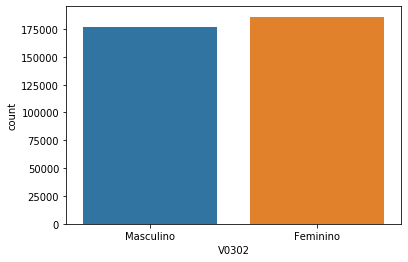

In [56]:
# Gráfico de barras de homens e mulheres
sns.countplot('V0302', data=pnad)

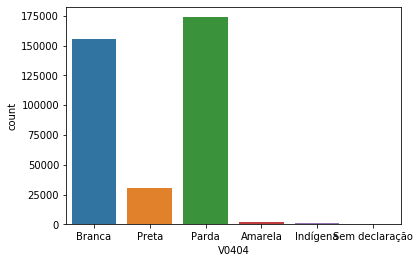

In [57]:
# Gráfico de barras por cor
sns.countplot('V0404', data=pnad)

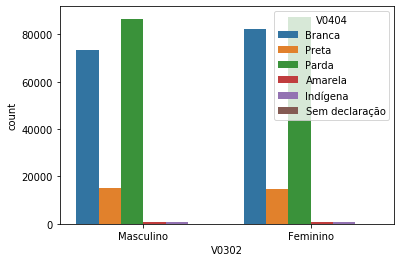

In [60]:
# Gráfico de barras por cor e sexo
sns.countplot('V0302', hue='V0404', data=pnad)

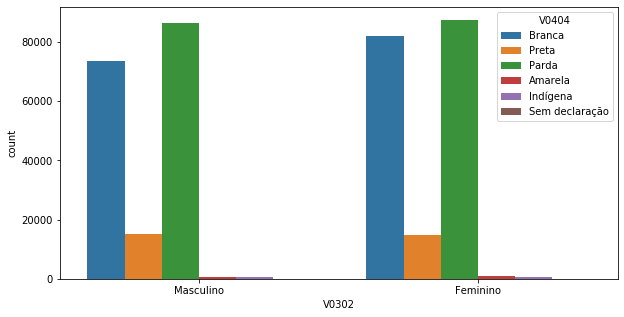

In [62]:
# para ficar um pouquinho maior
plt.figure(figsize=(10,5))
sns.countplot('V0302', hue='V0404', data=pnad)

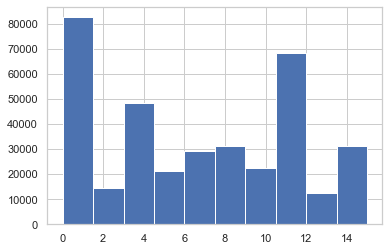

In [67]:
# Verificando a distribuição de anos de escolaridade
sns.set(style='whitegrid')
plt.hist(pnad.V4803)
plt.show()

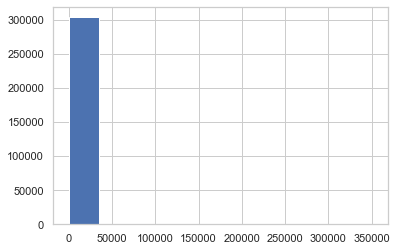

In [68]:
# Verificando a distribuição de renda
plt.hist(pnad.V4720)
plt.show()

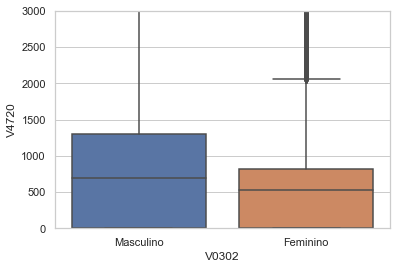

In [101]:
# Boxplot cruzando renda e sexo
sns.boxplot('V0302', 'V4720', data=pnad)
plt.ylim(0, 3000)
plt.show()

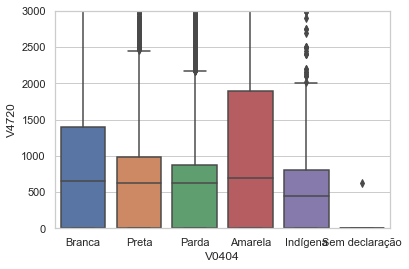

In [102]:
sns.boxplot('V0404', 'V4720', data=pnad)
plt.ylim(0, 3000)
plt.show()

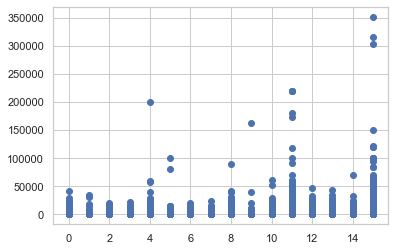

In [69]:
# Verificando a interação de escolaridade e renda
plt.scatter('V4803', 'V4720', data=pnad)
plt.show()

C:\Users\Neylson\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


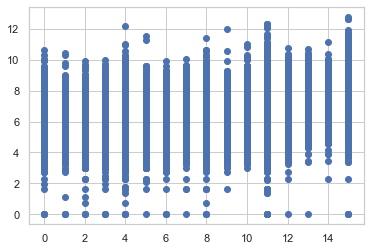

In [71]:
# Vamos utilizar o log da renda já pensando numa modelagem
plt.scatter(pnad.V4803, np.log(pnad.V4720))
plt.show()

In [105]:
# Vamos verificar a média de renda para cada idade no Brasil
# Primeiro, vamos separar apenas de 18 a 60 anos
recorte = pnad.loc[(pnad.V8005 >= 18) & (pnad.V8005 <= 60) & (pnad.V4720 > 0)]
recorte['logrenda'] = np.log(recorte.V4720)

C:\Users\Neylson\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [106]:
dd = recorte.groupby('V8005').agg({'logrenda': 'mean'})

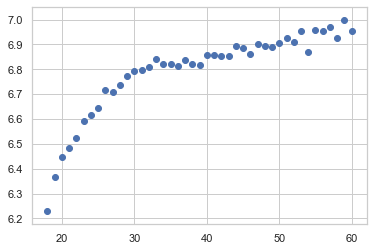

In [107]:
plt.scatter(dd.index, dd.logrenda)
plt.show()

## Um modelinho de regressão

In [108]:
import statsmodels.formula.api as smf

In [109]:
modelo = smf.ols(formula='logrenda ~ V4803 + V0302', data=recorte).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               logrenda   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                 3.189e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        23:47:29   Log-Likelihood:            -2.0400e+05
No. Observations:              168419   AIC:                         4.080e+05
Df Residuals:                  168416   BIC:                         4.080e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6243      0

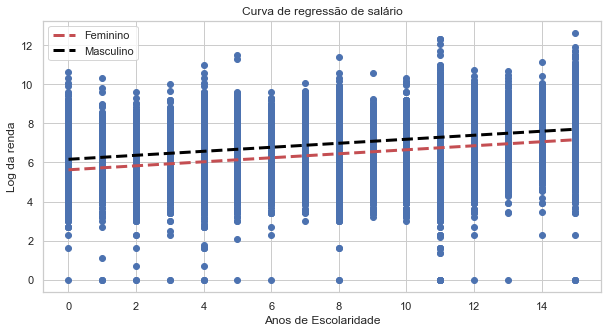

In [116]:
plt.figure(figsize=(10,5))
plt.scatter(recorte.V4803, recorte.logrenda)
xplot = np.linspace(recorte.V4803.min(), recorte.V4803.max(), recorte.shape[0])
plt.plot(xplot, xplot * modelo.params[2] + modelo.params[0], 
         label='Feminino', linewidth=3, c='r', linestyle='--')
plt.plot(xplot, xplot * modelo.params[2] + modelo.params[0] + modelo.params[1], 
         label='Masculino', linewidth=3, c='black', linestyle='--')
plt.xlabel("Anos de Escolaridade")
plt.ylabel("Log da renda")
plt.title("Curva de regressão de salário")
plt.legend()
plt.show()